### Build A Basic ChatBot With LangGraph (GRAPH API)

In [1]:
from typing_extensions import TypedDict               ## TypedDict -> Dict with Type Hints
from typing import Annotated                          ## Annotated -> Type Hints with Metadata

from langgraph.graph import StateGraph, START, END    ## StateGraph -> Graph API
from langgraph.graph.message import add_messages      ## Reducer -> Append Instead of Overwrite

In [2]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]  ## Messages -> List of Dicts with Metadata

In [3]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [4]:
from langchain_groq import ChatGroq

llm  = ChatGroq(model="llama-3.3-70b-versatile")

llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000026CDFF2CE60>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000026CE1141790>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

Same LLM But With Different Way ->

In [5]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("groq:llama-3.3-70b-versatile")

llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000026CDFE27CE0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000026CE117BAA0>, model_name='llama-3.3-70b-versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
def chatbot(state: State):
    return {
        "messages": [llm.invoke(state["messages"])]
    }

In [7]:
## Initialize the StateGraph with the defined state
graph_builder = StateGraph(State)

In [8]:
## ADD the chatbot function as Node to the graph
graph_builder.add_node("llmchatbot", chatbot)

In [9]:
## ADD Edges to the graph
graph_builder.add_edge(START, "llmchatbot")
graph_builder.add_edge("llmchatbot", END)

In [10]:
## Let's Compile the graph
graph = graph_builder.compile()

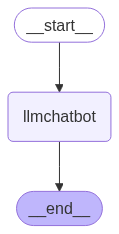

In [11]:
## Let's visualize the graph
from IPython.display import display, Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"Error displaying graph: {e}")

In [12]:
response = graph.invoke({
    "messages": "Explain me Quantum AI in simple terms."
})

In [13]:
response

{'messages': [HumanMessage(content='Explain me Quantum AI in simple terms.', additional_kwargs={}, response_metadata={}, id='29d7a570-59c0-4234-94dc-989cee68db35'),
  AIMessage(content="Quantum AI is a fascinating field that combines two complex concepts: Quantum Computing and Artificial Intelligence. I'll try to break it down in simple terms:\n\n**Quantum Computing:**\nImagine you have a huge library with an infinite number of books. A classical computer would look through the books one by one to find the information you need. A quantum computer, on the other hand, can look at all the books simultaneously, which makes it incredibly fast for certain types of calculations.\n\n**Artificial Intelligence (AI):**\nAI is like a super-smart robot that can learn from data, make decisions, and perform tasks on its own. It's like a computer program that can think and adapt like a human.\n\n**Quantum AI:**\nNow, imagine combining the power of quantum computing with the intelligence of AI. Quantum

In [17]:
response["messages"][-1].content

"Quantum AI is a fascinating field that combines two complex concepts: Quantum Computing and Artificial Intelligence. I'll try to break it down in simple terms:\n\n**Quantum Computing:**\nImagine you have a huge library with an infinite number of books. A classical computer would look through the books one by one to find the information you need. A quantum computer, on the other hand, can look at all the books simultaneously, which makes it incredibly fast for certain types of calculations.\n\n**Artificial Intelligence (AI):**\nAI is like a super-smart robot that can learn from data, make decisions, and perform tasks on its own. It's like a computer program that can think and adapt like a human.\n\n**Quantum AI:**\nNow, imagine combining the power of quantum computing with the intelligence of AI. Quantum AI uses the speed and capabilities of quantum computers to improve AI systems. This allows AI to:\n\n1. **Process vast amounts of data:** Quantum computers can handle enormous amounts 

In [18]:
for event in graph.stream({"messages":"What is Actually Agentic AI?"}):
    print(event)

{'llmchatbot': {'messages': [AIMessage(content='Agentic AI refers to a type of artificial intelligence (AI) that is capable of autonomous decision-making, problem-solving, and action-taking. The term "agentic" comes from the concept of agency, which refers to the ability of an entity to act independently and make choices that affect its environment.\n\nAgentic AI systems are designed to be proactive, self-directed, and adaptable, allowing them to navigate complex situations and make decisions without explicit human instruction. They can perceive their environment, reason about the current state of affairs, and take actions to achieve their goals, often in real-time.\n\nThe key characteristics of agentic AI include:\n\n1. **Autonomy**: Agentic AI systems can operate independently, making decisions and taking actions without human intervention.\n2. **Self-directedness**: They can set their own goals, prioritize tasks, and allocate resources to achieve their objectives.\n3. **Adaptability

In [19]:
for event in graph.stream({"messages":"What is Actually Agentic AI?"}):
    for value in event.values():
        print(value["messages"][-1].content)

Agentic AI refers to a type of artificial intelligence (AI) that is capable of autonomous decision-making and action, with the ability to achieve specific goals and objectives. The term "agentic" comes from the word "agent," which in AI refers to a program or system that can perceive its environment, reason, and act to achieve its goals.

Agentic AI systems are designed to be proactive, adaptable, and responsive to changing situations, much like human agents. They can interact with their environment, learn from experience, and make decisions based on their own goals, values, and preferences.

Key characteristics of agentic AI include:

1. **Autonomy**: Agentic AI systems can operate independently, making decisions and taking actions without human intervention.
2. **Goal-directed behavior**: Agentic AI systems are designed to achieve specific goals and objectives, which guide their decision-making and action.
3. **Self-awareness**: Agentic AI systems have a sense of their own capabiliti